울산권지사 온산(정) 원수 수질데이터 및 강수량에 대한 배수지 탁도 예측

1. 패키지 호출

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
plt.rcParams['font.family'] = 'Malgun Gothic' 

2. 데이터 호출 및 일간 데이터 프레임화

In [2]:

df = pd.read_csv('data_울산_2024.csv', encoding="cp949")

# 자동으로 날짜 컬럼 찾기
date_col = None
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        date_col = col
        break
    except Exception:
        continue

if date_col is None:
    raise ValueError("날짜 컬럼을 찾을 수 없습니다. 파일의 날짜 컬럼명을 직접 지정해주세요.")

df.set_index(date_col, inplace=True)

daily = df.resample('D').first()

3. 결측치 제거

In [3]:
daily_clean = daily.dropna()

4. Correlation heatmap

C:\Users\manor\AppData\Local\Temp\ipykernel_32472\3688453403.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\manor\anaconda3\envs\kpro_20182477\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


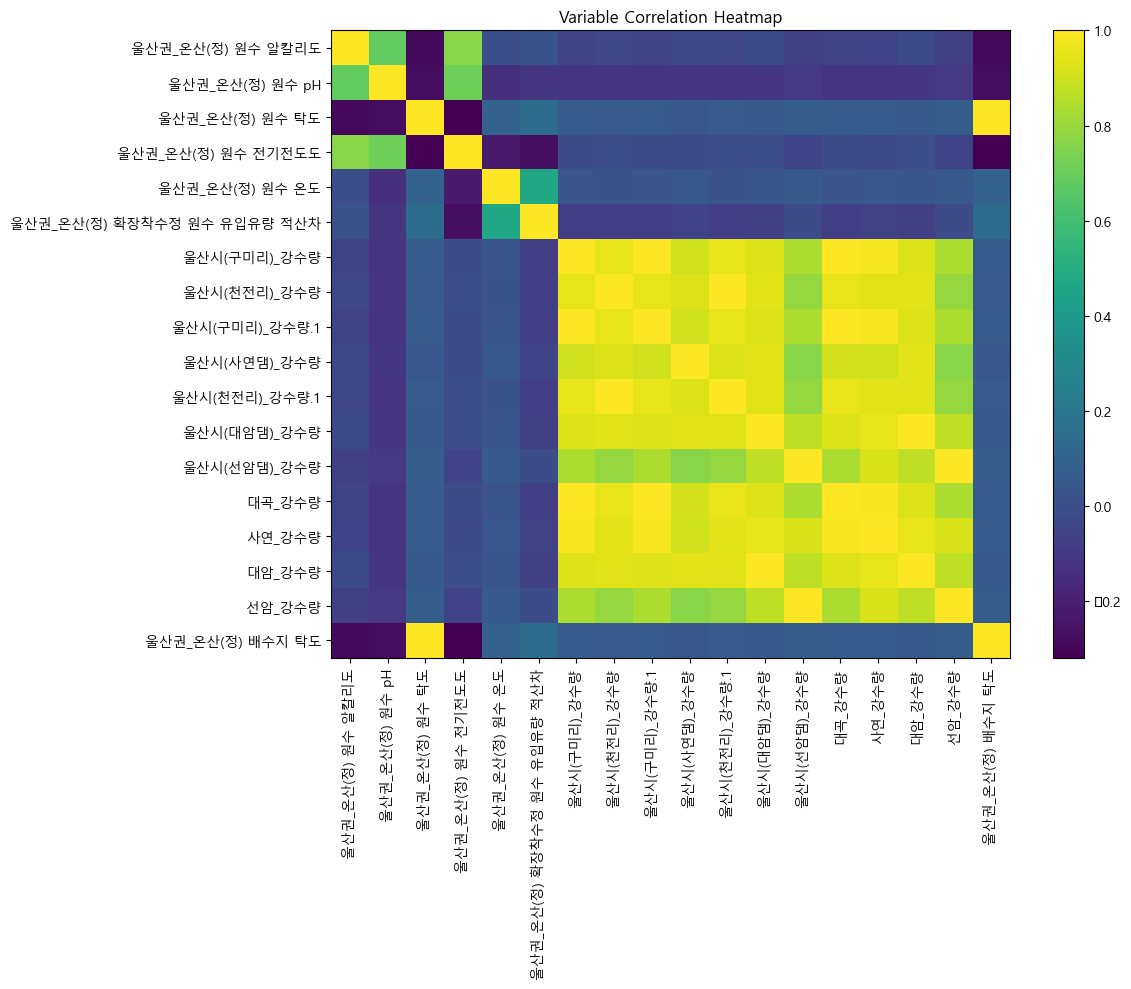

In [4]:
corr = daily_clean.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Variable Correlation Heatmap')
plt.tight_layout()
plt.show()

5. 학습 데이터셋 준비비

In [5]:
target = '울산권_온산(정) 배수지 탁도'
X = daily_clean.drop(columns=[target])
y = daily_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

6. 모델 학습(XGboost, Random forest, Light GBM) 및 성능(R²) 확인

In [6]:
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LGBM': LGBMRegressor(random_state=42)
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} R2 score: {r2:.4f}')
    predictions[name] = y_pred

RandomForest R2 score: 0.7419
XGBoost R2 score: 0.8406
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 17
[LightGBM] [Info] Start training from score 2.353253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

c:\Users\manor\anaconda3\envs\kpro_20182477\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\manor\anaconda3\envs\kpro_20182477\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\manor\anaconda3\envs\kpro_20182477\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manor\anaconda3\envs\kpro_20182477\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\manor\anaconda3\envs\kpro_20182477\Lib\subprocess.py"

7. 실제 배수지 탁도 vs 예측 탁도값 비교 그래프 시각화화

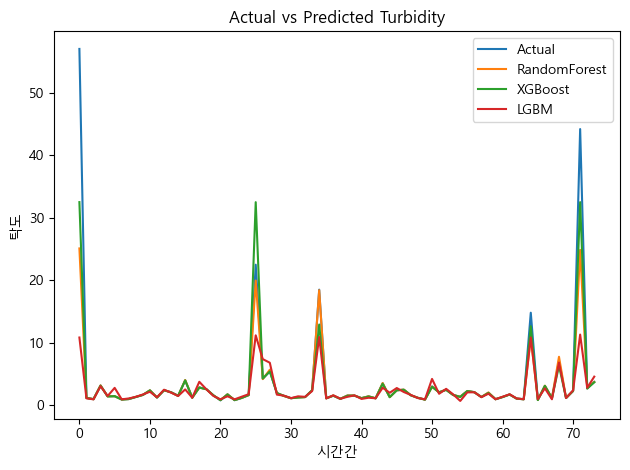

In [ ]:
plt.figure()
plt.plot(y_test.values, label='Actual')
for name, y_pred in predictions.items():
    plt.plot(y_pred, label=name)
plt.legend()
plt.title('Actual vs Predicted Turbidity')
plt.xlabel('타임테이블')
plt.ylabel('탁도')
plt.tight_layout()
plt.show()